Este es nuestro toolbox para la preparacion de datos para un modelo:

#  Distribución del Trabajo en el Equipo

1. **Reparto de Funciones:**  
   - Se dividieron las 6 funciones entre los distintos miembros del equipo.
   - Y por otro lado se realizo la elaboración del Notebook Explicativa y la pruebas de las funciones en su conjunto.

2. **Puesta en Común y Ajustes:**  
   - Se realizaron pequeñas pruebas conjuntas con el Titanic.
   - Se hicieron ajustes menores para mejorar la funcionalidad y corregir errores.

3. **Búsqueda de Datasets Alternativos:**  
   - Se exploraron diferentes datasets para validar las funciones.
   - Ninguno cumplía completamente con los requisitos de contar con **variables numéricas y categóricas correlacionadas con el target**.

`def describe_df(df)`
## 🔍 Descripción
- **Objetivo:** Generar un resumen detallado de cada columna de un DataFrame.
- **Uso:** Facilita la exploración de datos (EDA) antes del análisis o modelado.

## ⚙️ Parámetros
| Parámetro | Tipo           | Descripción |
|-----------|---------------|-------------|
| `df`      | `pd.DataFrame` | DataFrame a analizar. |

## 📊 Funcionamiento
1. **Recorre todas las columnas del DataFrame**.
2. **Calcula y almacena**:
   - Tipo de dato.
   - **% de valores nulos**.
   - **Número de valores únicos**.
   - **% de cardinalidad** (relación entre valores únicos y total de filas).
3. **Devuelve un DataFrame** con la información generada.

In [1]:
# Nombre del módulo: toolbox_ML.py

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr, f_oneway, kruskal
from scipy.stats import chi2_contingency

df = pd.read_csv("data/mpg.csv")
# 1) describe_df

def describe_df(df):
    """
    Devuelve un DataFrame con la descripción de cada columna del DataFrame de entrada.
    Muestra:
       - Tipo de dato
       - Porcentaje de valores nulos
       - Número de valores únicos
       - Porcentaje de cardinalidad

    Argumentos:
    df (pd.DataFrame): El DataFrame a describir.

    Retorna:
    pd.DataFrame: DataFrame con la información solicitada para cada columna.
    """

    # Listas para ir almacenando la información
    col_names = []
    dtypes = []
    perc_nulls = []
    unique_vals = []
    perc_cardinality = []

    n_rows = len(df)

    for col in df.columns:
        col_names.append(col)
        dtypes.append(df[col].dtype)

        # Porcentaje de nulos
        null_count = df[col].isna().sum()
        perc_null = (null_count / n_rows) * 100 if n_rows else 0
        perc_nulls.append(round(perc_null, 2))

        # Número de valores únicos
        nunique = df[col].nunique(dropna=False)
        unique_vals.append(nunique)

        # Porcentaje de cardinalidad
        perc_card = (nunique / n_rows) * 100 if n_rows else 0
        perc_cardinality.append(round(perc_card, 2))

    # Construimos el DataFrame de salida
    summary_df = pd.DataFrame({
        'columna': col_names,
        'tipo': dtypes,
        '%_nulos': perc_nulls,
        'valores_unicos': unique_vals,
        '%_cardinalidad': perc_cardinality
    })

    return summary_df

describe_df(df)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


`tipifica_variables(df, umbral_categoria=10, umbral_continua=0.2)`

## 🔍 Descripción
- **Objetivo:** Clasificar variables en **Binaria, Categórica, Numérica Discreta o Numérica Continua**.
- **Uso:** Facilita el análisis y preprocesamiento de datos para Machine Learning.

## ⚙️ Parámetros
| Parámetro          | Tipo           | Descripción |
|--------------------|---------------|-------------|
| `df`              | `pd.DataFrame` | Datos a analizar. |
| `umbral_categoria` | `int`          | Límite para ser categórica (`10` por defecto). |
| `umbral_continua`  | `float`        | Límite relativo para ser continua (`0.2` por defecto). |

## 📊 Funcionamiento
1. **Recorre todas las columnas del DataFrame**.
2. **Clasifica** según tipo de dato y cardinalidad:
   - `category` o `object` → **Categórica**.
   - Numérica:
     - 2 valores únicos → **Binaria**.
     - < `umbral_categoria` valores únicos → **Categórica**.
     - `card_rel` ≥ `umbral_continua` → **Numérica Continua**.
     - Resto → **Numérica Discreta**.
3. **Devuelve un DataFrame** con los tipos sugeridos.

In [12]:
def tipifica_variables(df, umbral_categoria=50, umbral_continua=0.2):
    """
    .
    """
    resultados = {
        'nombre_variable': [],
        'tipo_sugerido': []
    }
    n_rows = len(df)
    for col in df.columns:
        # Obtener el tipo de dato real
        dtype = df[col].dtype
        # Si el tipo de dato es 'category' o 'object', es categórico automáticamente
        if pd.api.types.is_categorical_dtype(dtype) or pd.api.types.is_object_dtype(dtype):
            tipo = 'Categórica'
        elif np.issubdtype(dtype, np.number):  # Si es numérico
            # Cardinalidad absoluta y relativa
            card_abs = df[col].nunique(dropna=False)
            card_rel = card_abs / n_rows if n_rows else 0
            # Clasificar como numérica
            if card_abs == 2:
                tipo = 'Binaria'
            elif card_abs < umbral_categoria:
                tipo = 'Categórica'
            else:
                if card_rel >= umbral_continua:
                    tipo = 'Numerica Continua'
                else:
                    tipo = 'Numerica Discreta'
        else:
            # Por seguridad, marcar como categórica cualquier otro tipo no esperado
            tipo = 'Categórica'
        # Guardar resultados
        resultados['nombre_variable'].append(col)
        resultados['tipo_sugerido'].append(tipo)
    return pd.DataFrame(resultados)
tipos_sugerido = tipifica_variables(df,50,0.2)
tipos_sugerido

C:\Users\Pablo\AppData\Local\Temp\ipykernel_6200\1581524181.py:14: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype) or pd.api.types.is_object_dtype(dtype):


,nombre_variable,tipo_sugerido
0,mpg,Numerica Continua
1,cylinders,Categórica
2,displacement,Numerica Continua
3,horsepower,Numerica Continua
4,weight,Numerica Continua
5,acceleration,Numerica Continua
6,model_year,Categórica
7,origin,Categórica
8,name,Categórica


`get_features_num_regression(df, target_col, umbral_corr, pvalue=None, tipo_variables=None)`

## 🔍 Descripción
- **Objetivo:** Seleccionar variables numéricas con una correlación significativa con la variable objetivo.
- **Uso:** Facilita la selección de características relevantes en modelos de regresión.

## ⚙️ Parámetros
| Parámetro        | Tipo            | Descripción |
|-----------------|----------------|-------------|
| `df`            | `pd.DataFrame`  | DataFrame con los datos. |
| `target_col`    | `str`           | Variable objetivo (debe ser numérica). |
| `umbral_corr`   | `float`         | Umbral mínimo de correlación absoluta (`0 - 1`). |
| `pvalue`        | `float`, opcional | Valor p para filtrar significancia estadística (`0 - 1`). |
| `tipo_variables` | `pd.DataFrame`, opcional | DataFrame con la clasificación de variables (de `tipifica_variables`). |

## 📊 Funcionamiento
1. **Verifica entradas:** Comprueba que `df` es un DataFrame, `target_col` existe y es numérica, y que `umbral_corr` y `pvalue` son válidos.
2. **Filtra variables numéricas:** Usa `tipo_variables` para seleccionar solo **Numéricas Continuas y Discretas**.
3. **Calcula la correlación de Pearson** con `target_col`.
4. **Aplica el umbral de correlación** (`umbral_corr`).
5. **Si `pvalue` está definido, filtra por significancia estadística**.
6. **Devuelve una lista de variables numéricas relevantes**.`get_features_num_regression(df, target_col, umbral_corr, pvalue=None, tipo_variables=None)`

## 🔍 Descripción
- **Objetivo:** Seleccionar variables numéricas con una correlación significativa con la variable objetivo.
- **Uso:** Facilita la selección de características relevantes en modelos de regresión.

## ⚙️ Parámetros
| Parámetro        | Tipo            | Descripción |
|-----------------|----------------|-------------|
| `df`            | `pd.DataFrame`  | DataFrame con los datos. |
| `target_col`    | `str`           | Variable objetivo (debe ser numérica). |
| `umbral_corr`   | `float`         | Umbral mínimo de correlación absoluta (`0 - 1`). |
| `pvalue`        | `float`, opcional | Valor p para filtrar significancia estadística (`0 - 1`). |
| `tipo_variables` | `pd.DataFrame`, opcional | DataFrame con la clasificación de variables (de `tipifica_variables`). |

## 📊 Funcionamiento
1. **Verifica entradas:** Comprueba que `df` es un DataFrame, `target_col` existe y es numérica, y que `umbral_corr` y `pvalue` son válidos.
2. **Filtra variables numéricas:** Usa `tipo_variables` para seleccionar solo **Numéricas Continuas y Discretas**.
3. **Calcula la correlación de Pearson** con `target_col`.
4. **Aplica el umbral de correlación** (`umbral_corr`).
5. **Si `pvalue` está definido, filtra por significancia estadística**.
6. **Devuelve una lista de variables numéricas relevantes**.

In [17]:
# 3) get_features_num_regression
# Nueva implementación

def get_features_num_regression(df, target_col, umbral_corr, pvalue=None, tipo_variables=None ):
    """
    Selecciona características numéricas que tengan una correlación significativa
    con la variable objetivo.

    Parámetros:
    df (pd.DataFrame): DataFrame que contiene las variables.
    target_col (str): Nombre de la columna objetivo.
    umbral_corr (float): Umbral mínimo de correlación (valor absoluto) para seleccionar las variables.
    pvalue (float, opcional): Valor p para filtrar variables con significancia estadística.
                              Por defecto es None.

    Retorna:
    list: Lista de nombres de columnas numéricas correlacionadas con el target,
          o None si los parámetros son inválidos.
    """
    # Validaciones de entrada
    if not isinstance(df, pd.DataFrame):
        print("El argumento 'df' debe ser un DataFrame.")
        return None

    if target_col not in df.columns:
        print(f"La columna objetivo '{target_col}' no se encuentra en el DataFrame.")
        return None

    if not np.issubdtype(df[target_col].dtype, np.number):
        print(f"La columna objetivo '{target_col}' debe ser numérica.")
        return None

    if not (0 <= umbral_corr <= 1):
        print("El valor de 'umbral_corr' debe estar entre 0 y 1.")
        return None

    if pvalue is not None and not (0 <= pvalue <= 1):
        print("El valor de 'pvalue' debe estar entre 0 y 1.")
        return None
    
    if tipo_variables is None or 'nombre_variable' not in tipo_variables.columns or 'tipo_sugerido' not in tipo_variables.columns:
        print("El argumento 'tipo_variables' debe ser un DataFrame generado por la función tipifica_variables.")
        return None
    
     # Inicializar lista para las columnas seleccionadas
    selected_features = []

    # Selección de columnas numéricas según la clasificación
    valid_types = ['Numerica Continua', 'Numerica Discreta']
    valid_cols = tipo_variables[tipo_variables['tipo_sugerido'].isin(valid_types)]['nombre_variable'].tolist()

    if target_col in valid_cols:
        valid_cols.remove(target_col)  # Excluir la columna objetivo

    for col in valid_cols:
        # Correlación (método Pearson simplificado usando .corr)
        corr = df[target_col].corr(df[col])

        if abs(corr) >= umbral_corr:
            if pvalue is not None:
                # Test de significancia estadística con pearsonr
                _, p_val = pearsonr(df[target_col], df[col])
                if p_val < pvalue:
                    selected_features.append(col)
            else:
                selected_features.append(col)

    return selected_features
x = get_features_num_regression(df,"mpg",0.2,0.05,tipos_sugerido)

x

['displacement', 'weight', 'acceleration']

`plot_features_num_regression(df, target_col="", columns=[], umbral_corr=0, pvalue=None)`

## 🔍 Descripción
- **Objetivo:** Seleccionar y visualizar la relación entre variables numéricas y la variable objetivo mediante **gráficos pairplot**.
- **Uso:** Ayuda a identificar correlaciones y patrones en regresión.

## ⚙️ Parámetros
| Parámetro    | Tipo            | Descripción |
|-------------|----------------|-------------|
| `df`        | `pd.DataFrame`  | DataFrame con los datos. |
| `target_col` | `str`           | Variable objetivo (debe ser numérica). |
| `columns`    | `list`, opcional | Lista de variables a evaluar (por defecto, selecciona todas las numéricas). |
| `umbral_corr` | `float`, opcional | Umbral mínimo de correlación (`0 - 1`, por defecto `0`). |
| `pvalue`     | `float`, opcional | Nivel de significancia estadística (`0 - 1`, por defecto `None`). |

## 📊 Funcionamiento
1. **Verifica entradas:** Comprueba que `df` es válido, que `target_col` existe y es numérica.
2. **Filtra columnas numéricas** si no se proporciona una lista.
3. **Calcula la correlación de Pearson** con `target_col`.
4. **Filtra por `umbral_corr`** y opcionalmente por `pvalue`.
5. **Genera gráficos pairplot en lotes de hasta 5 variables** para visualizar las relaciones.


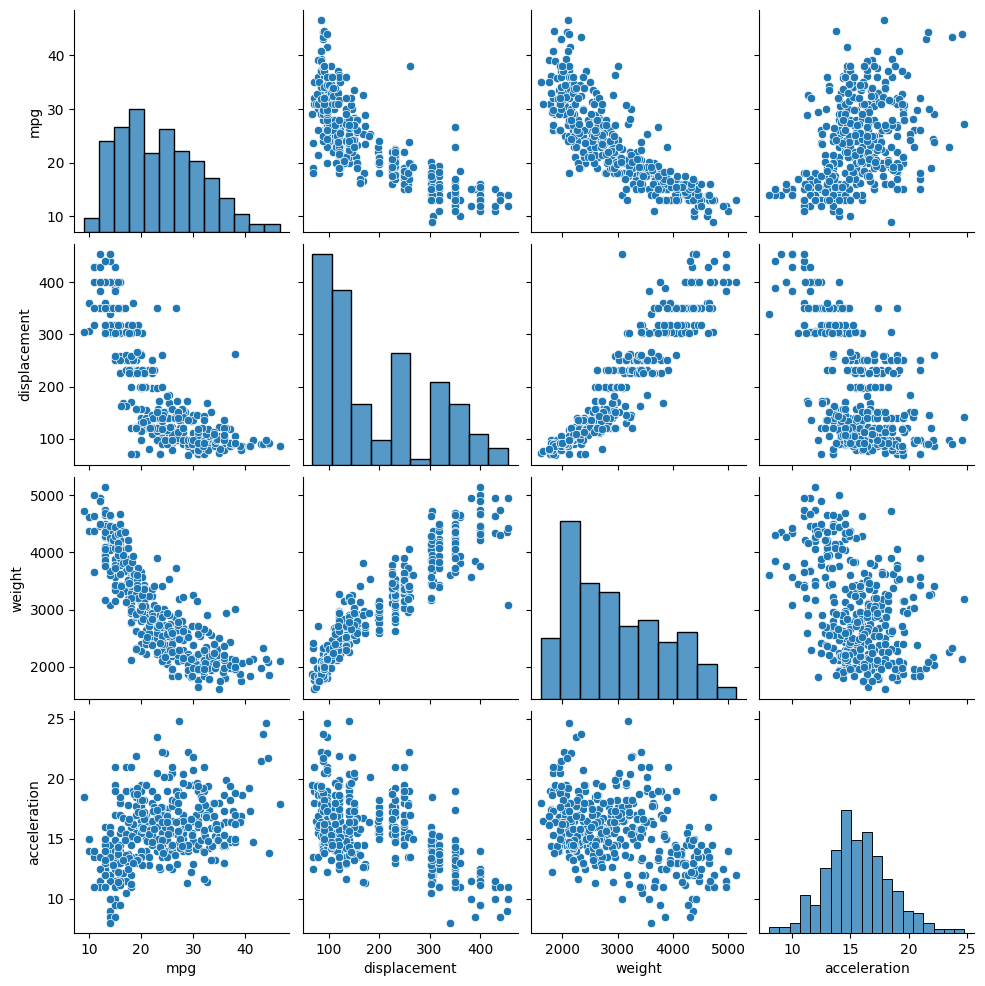

['displacement', 'weight', 'acceleration']

In [18]:
# 4) plot_features_num_regression
# Nueva implementación

def plot_features_num_regression(df, target_col="", columns=[], umbral_corr=0.2, pvalue=None):
    """
    Genera gráficos pairplot para las variables numéricas seleccionadas
    frente a la variable objetivo.

    Parámetros:
    df (pd.DataFrame): DataFrame con los datos.
    target_col (str, opcional): Nombre de la columna objetivo. Por defecto es una cadena vacía.
    columns (list, opcional): Lista de columnas numéricas a evaluar.
                              Por defecto es una lista vacía.
    umbral_corr (float, opcional): Umbral mínimo de correlación. Por defecto es 0.
    pvalue (float, opcional): Nivel de significancia estadística para el test de correlación.
                              Por defecto es None.

    Retorna:
    list: Lista de columnas que cumplen con las condiciones de correlación y significancia.
    """
    # Validaciones de entrada
    if not isinstance(df, pd.DataFrame):
        print("El argumento 'df' debe ser un DataFrame.")
        return None

    if target_col not in df.columns:
        print(f"La columna objetivo '{target_col}' no se encuentra en el DataFrame.")
        return None

    if not np.issubdtype(df[target_col].dtype, np.number):
        print(f"La columna objetivo '{target_col}' debe ser numérica.")
        return None

    if not (0 <= umbral_corr <= 1):
        print("El valor de 'umbral_corr' debe estar entre 0 y 1.")
        return None

    if pvalue is not None and not (0 <= pvalue <= 1):
        print("El valor de 'pvalue' debe estar entre 0 y 1.")
        return None

    # Si no se proporcionan columnas, seleccionamos todas las columnas numéricas 
    # excepto la columna objetivo
    if not columns:
        columns = df.select_dtypes(include=[np.number]).columns.drop(target_col).tolist()

    selected_features = []
    for col in columns:
        corr = df[target_col].corr(df[col])
        if abs(corr) >= umbral_corr:
            if pvalue is not None:
                _, p_val = pearsonr(df[target_col], df[col])
                if p_val < pvalue:
                    selected_features.append(col)
            else:
                selected_features.append(col)

    # Generación de gráficos pairplot en lotes de hasta 5 columnas
    max_features = 5
    for i in range(0, len(selected_features), max_features):
        subset = [target_col] + selected_features[i:i + max_features]
        sns.pairplot(df[subset])
        plt.show()

    return selected_features
plot_features_num_regression(df,"mpg",x,0.2,0.05)

`get_features_cat_regression(df, target_col, pvalue=0.05)`

## 🔍 Descripción
- **Objetivo:** Identificar variables categóricas que tienen una relación estadísticamente significativa con una variable numérica.
- **Uso:** Selección de características categóricas relevantes para modelos de regresión.

## ⚙️ Parámetros
| Parámetro    | Tipo            | Descripción |
|-------------|----------------|-------------|
| `df`        | `pd.DataFrame`  | DataFrame con los datos. |
| `target_col` | `str`           | Variable objetivo (debe ser numérica). |
| `pvalue`     | `float`, opcional | Nivel de significancia estadística (`0 - 1`, por defecto `0.05`). |

## 📊 Funcionamiento
1. **Verifica entradas:** Comprueba que `target_col` existe, es numérica y que `pvalue` es válido.
2. **Filtra variables categóricas** (`object` o `category`).
3. **Agrupa valores de `target_col` por cada categoría** en cada columna categórica.
4. **Realiza pruebas estadísticas**:
   - **ANOVA** si hay más de una categoría con datos.
   - Si ANOVA no es válido, usa **Kruskal-Wallis**.
5. **Selecciona variables categóricas** cuyo `p-value` < `pvalue`.

In [23]:
#5 
def get_features_cat_regression(df, target_col, pvalue=0.05):
    """
    Devuelve la lista de columnas categóricas del DataFrame que tienen relación
    estadísticamente significativa con la columna numérica 'target_col'.
    Para cada columna categórica, se agrupan los valores de la variable objetivo
    y se realiza un test ANOVA o Kruskal-Wallis de forma simplificada.
    Argumentos:
    df (pd.DataFrame): El DataFrame de entrada.
    target_col (str): Nombre de la columna target (numérica) para la regresión.
    pvalue (float): Nivel de significación estadística. Por defecto, 0.05.
    Retorna:
    list or None: Lista de columnas categóricas que cumplen con el test estadístico
                  o None si hay errores en los argumentos.
    """
    # Comprobaciones de entrada
    if target_col not in df.columns:
        print(f"Error: La columna '{target_col}' no existe en el DataFrame.")
        return None
    if not np.issubdtype(df[target_col].dtype, np.number):
        print(f"Error: La columna '{target_col}' no es numérica.")
        return None
    if not (0 < pvalue < 1):
        print("Error: pvalue debe estar entre 0 y 1.")
        return None
    # Filtramos columnas categóricas
    cat_cols = [col for col in df.columns
                if df[col].dtype == 'object'
                or df[col].dtype.name == 'category']
    selected_features = []
    for col in cat_cols:
        grupos = []
        for categoria in df[col].dropna().unique():
            grupos.append(df.loc[df[col] == categoria, target_col].dropna())
        if len(grupos) > 1:
            stat, p_val = f_oneway(*grupos)
            if np.isnan(p_val):
                stat, p_val = kruskal(*grupos)
            if p_val < pvalue:
                selected_features.append(col)
    return selected_features

z = get_features_cat_regression(df,"mpg", 0.02)
z

['origin', 'name']

`plot_features_cat_regression(df, target_col, columns=[], p_value=0.05, with_individual_plot=False)`

## 🔍 Descripción
- **Objetivo:** Identificar y visualizar variables categóricas que tienen una relación estadísticamente significativa con una variable numérica continua.
- **Uso:** Filtrar variables categóricas relevantes para modelos de regresión.

## ⚙️ Parámetros
| Parámetro             | Tipo            | Descripción |
|----------------------|----------------|-------------|
| `df`                | `pd.DataFrame`  | DataFrame con los datos. |
| `target_col`        | `str`           | Variable objetivo (numérica continua). |
| `columns`           | `list`, opcional | Lista de variables categóricas a evaluar (por defecto, selecciona todas las categóricas). |
| `p_value`           | `float`, opcional | Nivel de significancia estadística (`0 - 1`, por defecto `0.05`). |
| `with_individual_plot` | `bool`, opcional | Si `True`, genera histogramas por categoría (`False` por defecto). |

## 📊 Funcionamiento
1. **Verifica entradas:** Comprueba que `df` es un DataFrame, que `target_col` es numérica y que `p_value` es válido.
2. **Selecciona variables categóricas** si `columns` no está definido.
3. **Realiza una prueba Chi-cuadrado** entre cada variable categórica y `target_col` para evaluar la relación estadística.
4. **Filtra las variables con `p-value < p_value`** (significativas).
5. **Genera histogramas** por categoría si `with_individual_plot=True`.


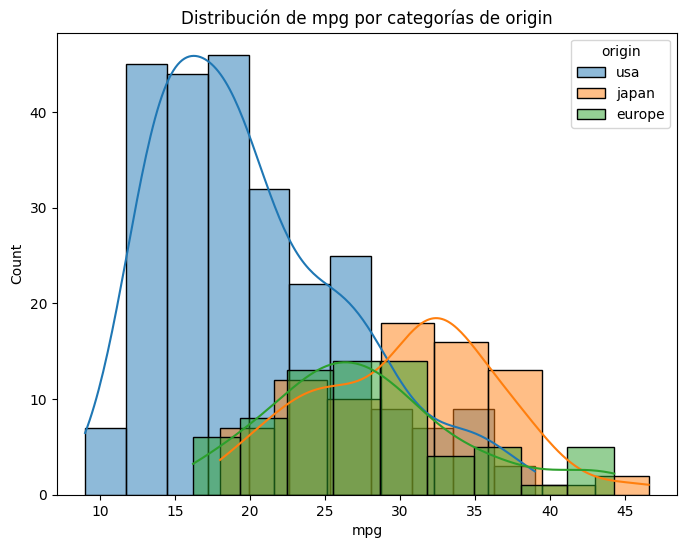

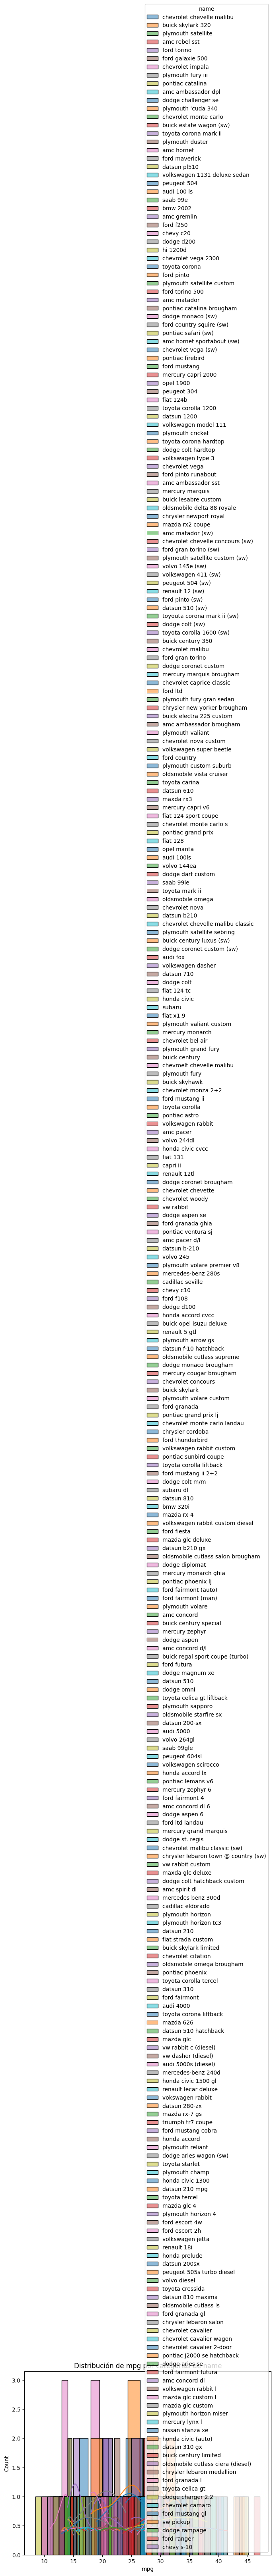

['origin', 'name']

In [28]:

def plot_features_cat_regression(df, target_col="", columns=None, pvalue=0.05, with_individual_plot=False):
    """
    Para cada columna categórica en 'columns', se verifica si existe relación 
    estadísticamente significativa con 'target_col' usando ANOVA o Kruskal-Wallis.
    Luego se pintan histogramas del target_col para cada categoría de la variable.

    Parámetros:
    df (pd.DataFrame): El DataFrame de entrada.
    target_col (str): Nombre de la columna target (numérica).
    columns (list, opcional): Lista de columnas categóricas a analizar. 
                              Por defecto, None (se cogen todas las categóricas).
    pvalue (float, opcional): Nivel de significación estadística. Por defecto 0.05.
    with_individual_plot (bool, opcional): Si es True, un histograma por cada categoría.
                                           Si es False, todas las categorías se superponen.
                                           Por defecto es False.

    Retorna:
    list or None: Lista de columnas categóricas que cumplen los criterios (o None si hay error).
    """
    # Comprobaciones de entrada
    if target_col not in df.columns:
        print(f"Error: La columna '{target_col}' no existe en el DataFrame.")
        return None

    if not np.issubdtype(df[target_col].dtype, np.number):
        print(f"Error: La columna '{target_col}' no es numérica.")
        return None

    if columns is None:
        columns = []

    if not (0 < pvalue < 1):
        print("Error: pvalue debe estar entre 0 y 1.")
        return None

    # Si columns está vacía, tomamos columnas categóricas
    if len(columns) == 0:
        columns = [col for col in df.columns
                   if df[col].dtype == 'object'
                   or df[col].dtype.name == 'category']

    final_cols = []
    for col in columns:
        if col not in df.columns:
            continue
        if df[col].dtype not in ['object', 'category']:
            continue

        # Creamos grupos
        grupos = []
        for categoria in df[col].dropna().unique():
            grupos.append(df.loc[df[col] == categoria, target_col].dropna())

        if len(grupos) > 1:
            stat, p_val = f_oneway(*grupos)
            if np.isnan(p_val):
                stat, p_val = kruskal(*grupos)
            if p_val < pvalue:
                final_cols.append(col)

    # Pintamos los histogramas
    for col in final_cols:
        plt.figure(figsize=(8, 6))
        if with_individual_plot:
            # Un histograma por categoría en gráficos separados
            categorias = df[col].dropna().unique()
            for cat_value in categorias:
                subset = df[df[col] == cat_value]
                sns.histplot(subset[target_col], kde=True)
                plt.title(f"Distribución de {target_col} para {col} = {cat_value}")
                plt.show()
        else:
            # Un solo histograma con todas las categorías superpuestas
            categorias = df[col].dropna().unique()
            for cat_value in categorias:
                subset = df[df[col] == cat_value]
                sns.histplot(subset[target_col], kde=True, label=str(cat_value), alpha=0.5)
            plt.title(f"Distribución de {target_col} por categorías de {col}")
            plt.legend(title=col)
            plt.show()

    return final_cols
y = plot_features_cat_regression(df,"mpg",z,0.05,False)
y

Parámetros:
    df (pd.DataFrame): DataFrame que contiene las variables.
    target_Col(str, opcional): Nombre de la columna objetivo. Por defecto es una cadena vacía.
    columns(list, opcional): Lista de las columnas a categóricas a evaluar. Por defecto es una lista vacía.
    p_value(float, opcional): Nivel de significancia estadística para el test de correlación. Por defecto es 0.05.
    with_individual_plot(bool, opcional): Si es True, genera histogramas por categoría. Por defecto es False.
    Retorna:
    list: Lista de columnas (categóricas) que pasan el test de correlación.